In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/Jiwon/Documents/GitHub/advanced_project/jiwon_project/presentation/jiwon_entire.csv")

In [3]:
pip install ace_tools


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



=== Private vs Non‑Private ===


,is_private,count,pct
0,True,15143,73.652724
1,False,5417,26.347276



=== Room Type Distribution ===


,room_type,count,pct
0,room_type_Entire home/apt,11148,54.221790
1,room_type_Private room,9005,43.798638
2,room_type_Shared room,81,0.393969
3,room_type_Hotel room,326,1.585603


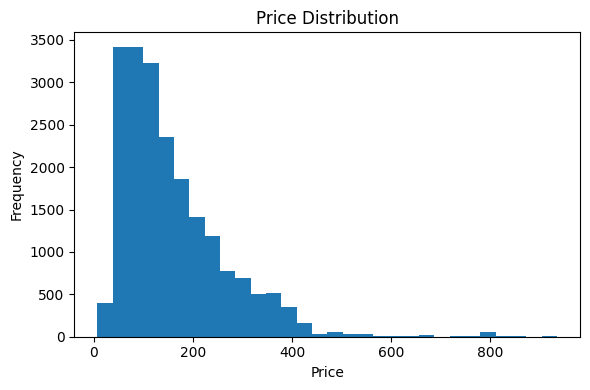

<Figure size 600x400 with 0 Axes>

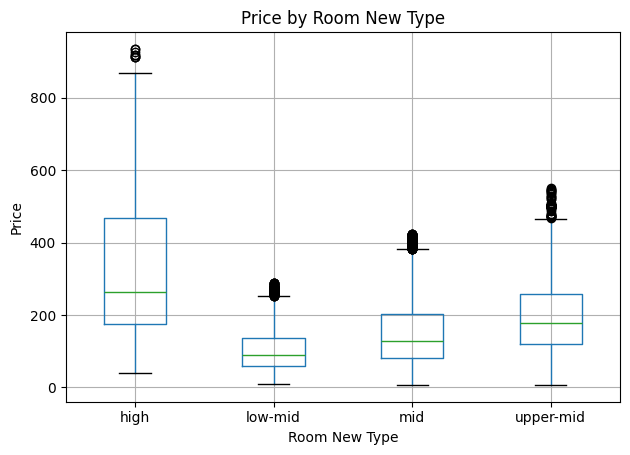


=== Average Price by Room Type ===


,room_type,avg_price
0,Entire home/apt,193.809921
1,Private room,105.380122
2,Shared room,95.592593
3,Hotel room,400.861963



=== Host Listings Count Distribution ===


,count,count
0,1.0,3723
1,2.0,2669
2,3.0,1882
3,4.0,1315
4,5.0,1002
...,...,...
122,5458.0,763
123,5758.0,204
124,5928.0,155
125,8145.0,4



Professional hosts (>1 listing): 81.80%



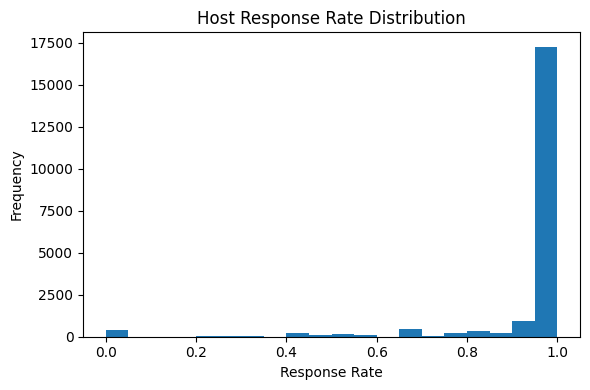


=== Host Verifications Count Distribution ===


,count,count
0,0,18
1,1,1975
2,2,15830
3,3,2737


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display  # Jupyter 전용


# 2. 개인실 vs 전체 홈 카운트 & 퍼센트
private_counts = df['is_private'].value_counts()
private_pct    = df['is_private'].value_counts(normalize=True) * 100
private_df = (
    pd.DataFrame({'count': private_counts, 'pct': private_pct})
      .reset_index()
      .rename(columns={'index': 'is_private'})
)
print("\n=== Private vs Non‑Private ===")
display(private_df)


# 3. Room‑type 분포 (one‑hot 컬럼 합계)
room_cols  = [
    'room_type_Entire home/apt',
    'room_type_Private room',
    'room_type_Shared room',
    'room_type_Hotel room'
]
room_counts = df[room_cols].sum()
room_pct    = df[room_cols].mean() * 100
room_df = (
    pd.DataFrame({'count': room_counts, 'pct': room_pct})
      .reset_index()
      .rename(columns={'index': 'room_type'})
)
print("\n=== Room Type Distribution ===")
display(room_df)


# 4. 가격 분포 히스토그램
plt.figure(figsize=(6,4))
plt.hist(df['price'], bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 5. room_new_type 별 가격 박스플롯
plt.figure(figsize=(6,4))
df.boxplot(column='price', by='room_new_type')
plt.title('Price by Room New Type')
plt.suptitle('')        # 기본 서브타이틀 제거
plt.xlabel('Room New Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


# 6. room type 별 평균 가격
avg_price = {
    rt.replace('room_type_', ''): df.loc[df[rt] == 1, 'price'].mean()
    for rt in room_cols
}
avg_price_df = (
    pd.DataFrame.from_dict(avg_price, orient='index', columns=['avg_price'])
      .reset_index()
      .rename(columns={'index': 'room_type'})
)
print("\n=== Average Price by Room Type ===")
display(avg_price_df)


# 7. 호스트 리스팅 수 분포
host_listings = df['host_total_listings_count'].value_counts().sort_index()
host_listings_df = (
    host_listings.reset_index()
                  .rename(columns={'index': 'total_listings', 'host_total_listings_count': 'count'})
)
print("\n=== Host Listings Count Distribution ===")
display(host_listings_df)


# 8. 전문 호스트 비율
prof_pct = (df['host_total_listings_count'] > 1).mean() * 100
print(f"\nProfessional hosts (>1 listing): {prof_pct:.2f}%\n")


# 9. 호스트 응답률 분포
plt.figure(figsize=(6,4))
plt.hist(df['host_response_rate'], bins=20)
plt.title('Host Response Rate Distribution')
plt.xlabel('Response Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 10. 호스트 인증 수 분포
ver_count   = df['host_verifications_count'].value_counts().sort_index()
ver_count_df = (
    ver_count.reset_index()
             .rename(columns={'index': 'verification_count', 'host_verifications_count': 'count'})
)
print("\n=== Host Verifications Count Distribution ===")
display(ver_count_df)


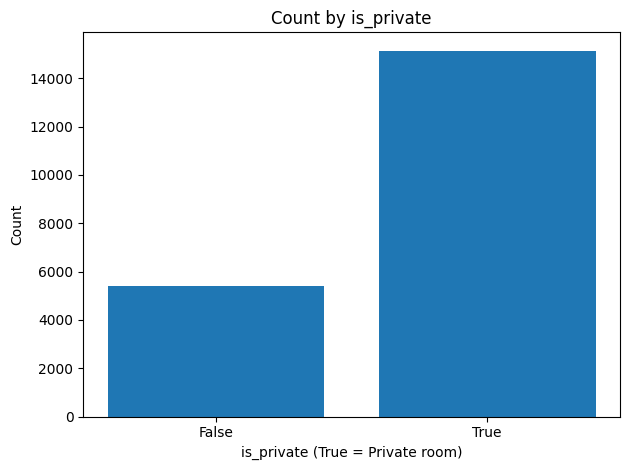

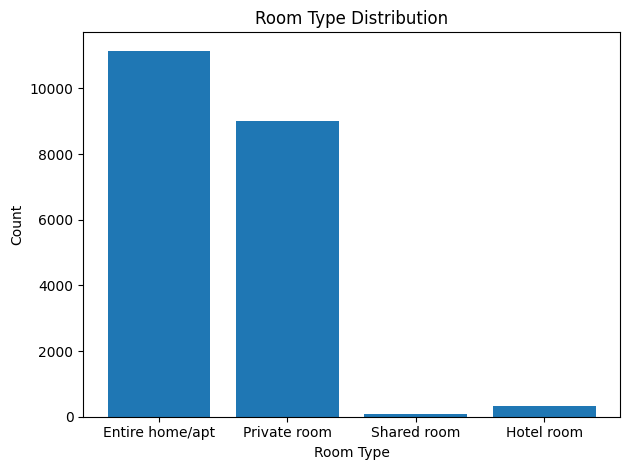

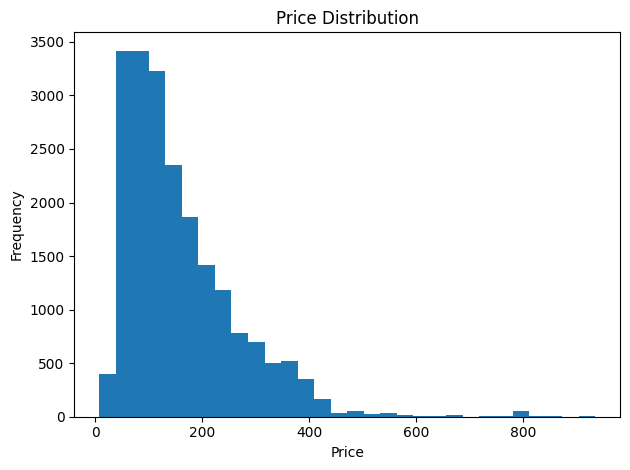

<Figure size 640x480 with 0 Axes>

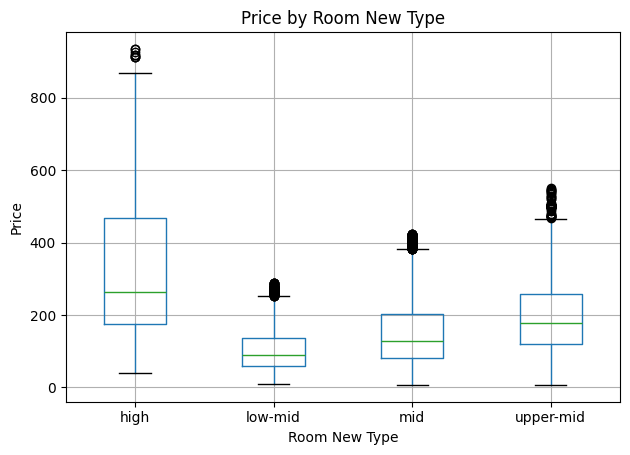

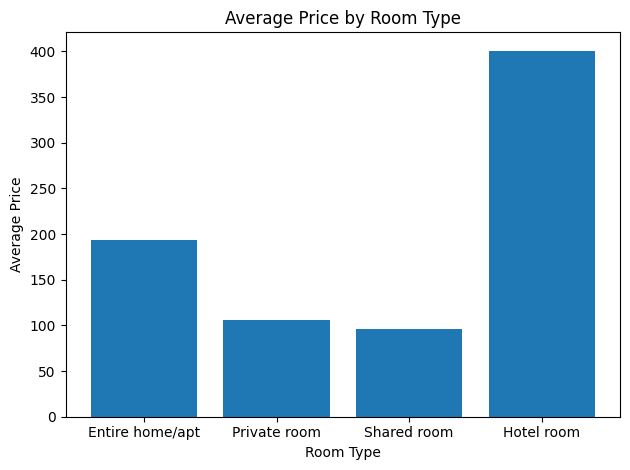

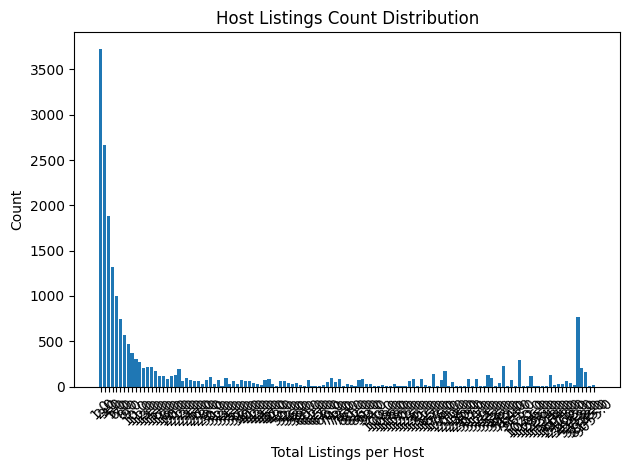

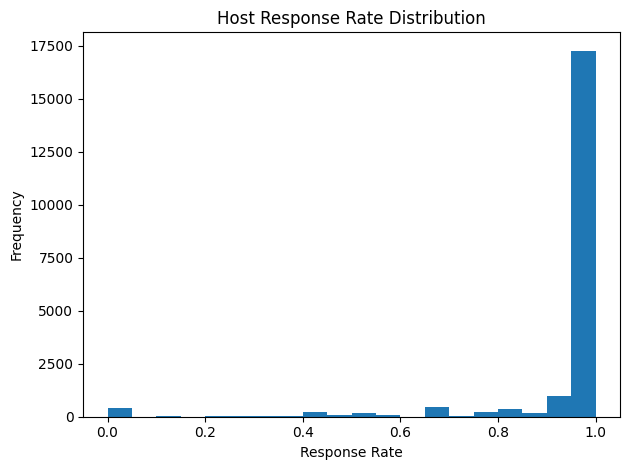

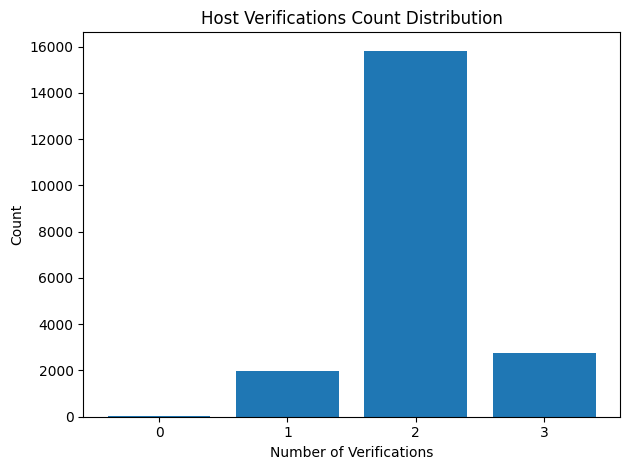

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data


# 1. Private vs Non‑private counts
private_counts = df['is_private'].value_counts().sort_index()
plt.figure()
plt.bar(private_counts.index.astype(str), private_counts.values)
plt.title('Count by is_private')
plt.xlabel('is_private (True = Private room)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Room type distribution
room_cols = [
    'room_type_Entire home/apt',
    'room_type_Private room',
    'room_type_Shared room',
    'room_type_Hotel room'
]
room_counts = df[room_cols].sum()
room_labels = [col.replace('room_type_', '') for col in room_cols]
plt.figure()
plt.bar(room_labels, room_counts.values)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Price distribution histogram
plt.figure()
plt.hist(df['price'], bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Price by room_new_type (boxplot)
plt.figure()
df.boxplot(column='price', by='room_new_type')
plt.title('Price by Room New Type')
plt.suptitle('')
plt.xlabel('Room New Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# 5. Average price by room type
avg_price = {
    rt.replace('room_type_', ''): df.loc[df[rt] == 1, 'price'].mean()
    for rt in room_cols
}
plt.figure()
plt.bar(list(avg_price.keys()), list(avg_price.values()))
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# 6. Host total listings count distribution
host_listings = df['host_total_listings_count'].value_counts().sort_index()
plt.figure()
plt.bar(host_listings.index.astype(str), host_listings.values)
plt.title('Host Listings Count Distribution')
plt.xlabel('Total Listings per Host')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Host response rate distribution
plt.figure()
plt.hist(df['host_response_rate'], bins=20)
plt.title('Host Response Rate Distribution')
plt.xlabel('Response Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 8. Host verifications count distribution
ver_count = df['host_verifications_count'].value_counts().sort_index()
plt.figure()
plt.bar(ver_count.index.astype(str), ver_count.values)
plt.title('Host Verifications Count Distribution')
plt.xlabel('Number of Verifications')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



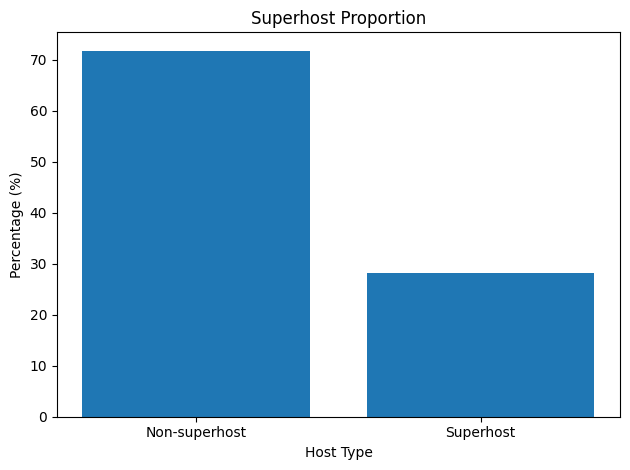

In [10]:
import pandas as pd
import matplotlib.pyplot as plt



# Map host_is_superhost to English labels
mapping = {True: 'Superhost', False: 'Non-superhost', 't': 'Superhost', 'f': 'Non-superhost'}
labels = df['host_is_superhost'].map(mapping)

# Calculate percentages
pct = labels.value_counts(normalize=True) * 100

# Plot
plt.figure()
plt.bar(pct.index, pct.values)
plt.title('Superhost Proportion')
plt.xlabel('Host Type')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()


                           mean   median  count
host_is_superhost                              
Non-superhost       4723.367651      0.0  14764
Superhost          14394.806763  18000.0   5796


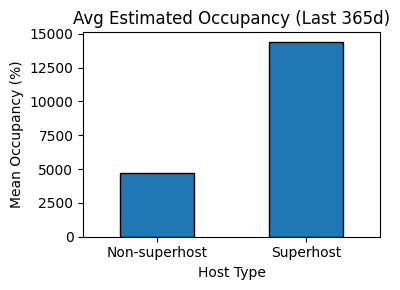

<Figure size 640x480 with 0 Axes>

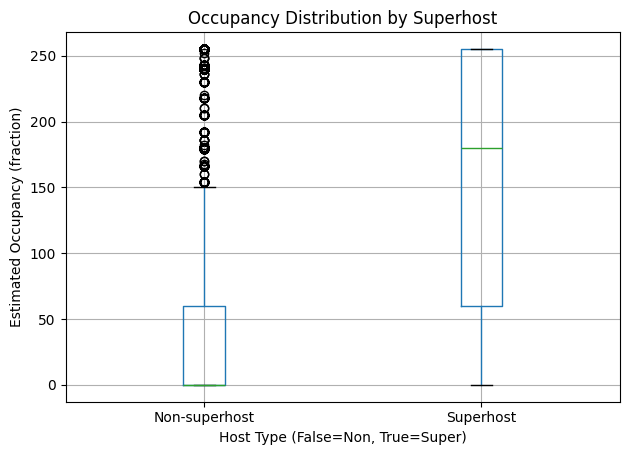

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 3) 그룹별 통계 계산 (fraction → %로 변환)
stats = (
    df.groupby('host_is_superhost')['estimated_occupancy_l365d']
      .agg(['mean', 'median', 'count'])
)
stats['mean']   = stats['mean']   * 100
stats['median'] = stats['median'] * 100

print(stats.rename(index={False: 'Non-superhost', True: 'Superhost'}))

# 4) 평균 점유율 비교 바 차트
plt.figure()
stats['mean'].plot(kind='bar', edgecolor='k', figsize=(4,3))
plt.title('Avg Estimated Occupancy (Last 365d)')
plt.xlabel('Host Type')
plt.ylabel('Mean Occupancy (%)')
plt.xticks([0,1], ['Non-superhost', 'Superhost'], rotation=0)
plt.tight_layout()
plt.show()

# 5) 분포 비교 박스플롯
plt.figure()
df.boxplot(column='estimated_occupancy_l365d', by='host_is_superhost')
plt.title('Occupancy Distribution by Superhost')
plt.suptitle('')
plt.xlabel('Host Type (False=Non, True=Super)')
plt.ylabel('Estimated Occupancy (fraction)')
plt.xticks([1,2], ['Non-superhost', 'Superhost'], rotation=0)
plt.tight_layout()
plt.show()


In [11]:
seoul_data = pd.read_csv("/Users/Jiwon/Desktop/seoulbnb.csv")

In [12]:
seoul_data


,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohosts,superhost,...,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,50809,SLA-Duplex Loft (Not Recommened under 12yr),Entire serviced apartment,entire_home,https://a0.muscache.com/im/pictures/215ee9be-e...,55,233925,Dennis,NaN,True,...,0.2,0.0,28.5,41971.7,0.0,0.0,15,0,75,90
1,69022,Design Penthouse with amazing view in Gangnam,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/c925a23d-2...,46,336731,Kay,29973852:Heezin,True,...,0.9,0.0,322.8,461197.5,0.0,0.0,80,0,10,90
2,118591,SLA-3 Bedroom (Monthly Discount/SNUH),Entire serviced apartment,entire_home,https://a0.muscache.com/im/pictures/241b3cca-b...,45,233925,Dennis,NaN,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90
3,265944,Artist gallery house,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/8347950/45...,54,1446422,Vivi,NaN,True,...,0.5,0.0,136.7,195734.5,0.0,0.0,45,0,45,90
4,305641,btw SEOUL STATION & HONGDAE -apt304,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/4becd4d0-5...,30,1572120,Seok,NaN,False,...,0.3,0.3,22.8,32716.1,23.4,33459.6,27,2,63,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7861218,Hanshouse Private Room,Private room in home,private_room,https://a0.muscache.com/im/pictures/c9f609a8-e...,31,5311036,Seunghan,NaN,True,...,0.3,0.0,18.8,26773.1,0.0,0.0,28,0,62,90
296,7861234,Hanshouse Familyroom A,Private room in home,private_room,https://a0.muscache.com/im/pictures/miso/Hosti...,33,5311036,Seunghan,NaN,True,...,0.1,0.1,9.8,13755.7,11.3,15872.0,11,12,79,90
297,7939849,Studio flat near Metro and Parks,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/miso/Hosti...,26,41873042,Jerry Chang,477658486:은진,False,...,0.3,0.8,14.6,21326.8,32.0,46814.9,31,49,59,90
298,7950094,NonHyeon dong cosy house(two entire room),Entire home,entire_home,https://a0.muscache.com/im/pictures/106771291/...,23,32257345,Lu,NaN,True,...,1.0,0.0,64.6,92402.8,0.0,0.0,88,0,2,90


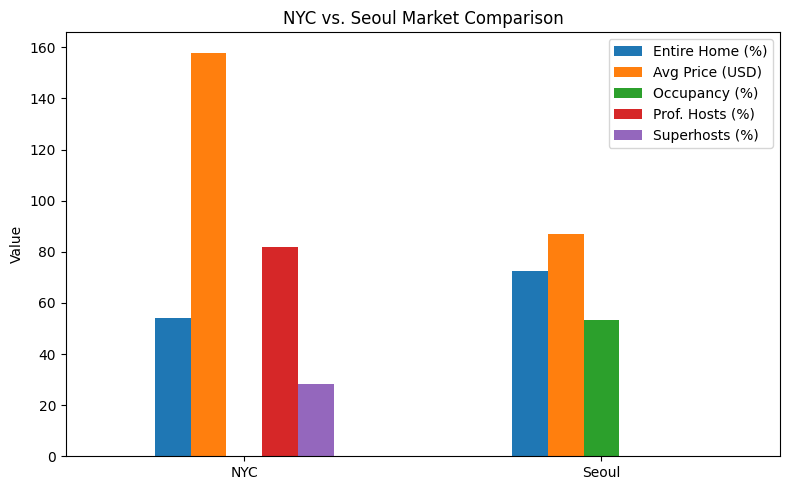

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load NYC listing data
df_nyc = df

# 2. Compute key metrics for NYC
nyc_entire_ratio = (df_nyc['room_type_Entire home/apt'].mean() * 100)  # Entire home %
nyc_avg_price    = df_nyc['price'].mean()                             # Avg price
nyc_occ_rate     = None  # Not available in listing data
nyc_prof_ratio   = ((df_nyc['host_total_listings_count'] > 1).mean() * 100)
nyc_super_ratio  = (df_nyc['host_is_superhost'].map({True:1, False:0, 't':1, 'f':0}).mean() * 100)

# 3. Seoul summary metrics (from AirROI & Airbtics)
seoul_entire_ratio = 72.5   # % from report
seoul_avg_adr      = 87     # $
seoul_occ_rate     = 53.2   # % occupancy
seoul_prof_ratio   = None   # Not provided
seoul_super_ratio  = None   # Not provided

# 4. Assemble comparison DataFrame
metrics = {
    'Entire Home (%)':     [nyc_entire_ratio, seoul_entire_ratio],
    'Avg Price (USD)':     [nyc_avg_price, seoul_avg_adr],
    'Occupancy (%)':       [nyc_occ_rate or float('nan'), seoul_occ_rate],
    'Prof. Hosts (%)':     [nyc_prof_ratio, seoul_prof_ratio or float('nan')],
    'Superhosts (%)':      [nyc_super_ratio, seoul_super_ratio or float('nan')],
}
df_compare = pd.DataFrame(metrics, index=['NYC', 'Seoul'])

# 5. Plot comparison for available metrics
df_compare = df_compare[['Entire Home (%)', 'Avg Price (USD)', 'Occupancy (%)', 
                         'Prof. Hosts (%)', 'Superhosts (%)']]

df_compare.plot(kind='bar', figsize=(8,5))
plt.title('NYC vs. Seoul Market Comparison')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

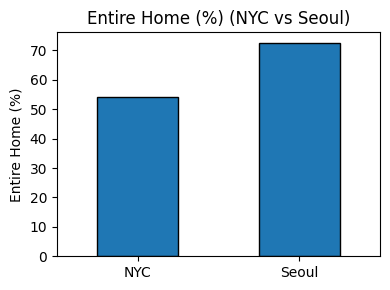

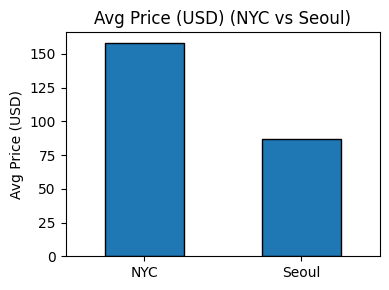

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load NYC data

# Define comparison metrics
metrics = {
    'Entire Home (%)': [
        df_nyc['room_type_Entire home/apt'].mean() * 100,
        72.5  # Seoul from report
    ],
    'Avg Price (USD)': [
        df_nyc['price'].mean(),
        87    # Seoul ADR
    ],
    'Occupancy (%)': [
        np.nan,   # Not available for NYC
        53.2      # Seoul occupancy
    ],
    'Prof. Hosts (%)': [
        (df_nyc['host_total_listings_count'] > 1).mean() * 100,
        np.nan    # Not provided for Seoul
    ],
    'Superhosts (%)': [
        df_nyc['host_is_superhost']
            .map({True:1, False:0, 't':1, 'f':0})
            .mean() * 100,
        np.nan    # Not provided for Seoul
    ]
}

# Assemble DataFrame
df_cmp = pd.DataFrame(metrics, index=['NYC', 'Seoul']).T

# Plot each metric where both cities have data
for metric, row in df_cmp.iterrows():
    comp = row.dropna()
    if len(comp) == 2:
        comp.plot(kind='bar', figsize=(4,3), edgecolor='k')
        plt.title(f'{metric} (NYC vs Seoul)')
        plt.ylabel(metric)
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()


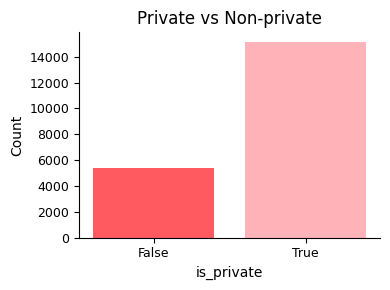

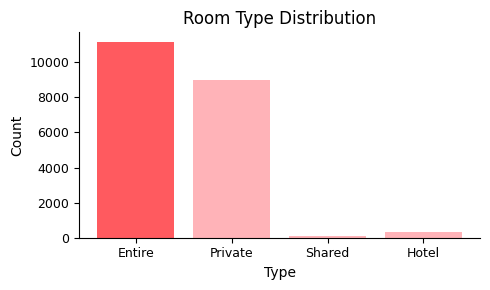

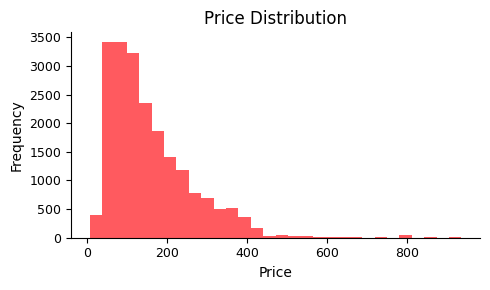

<Figure size 500x300 with 0 Axes>

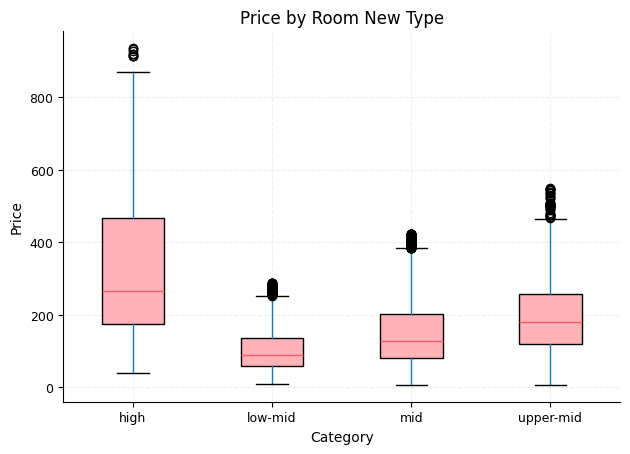

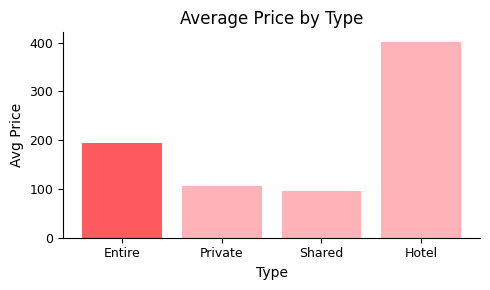

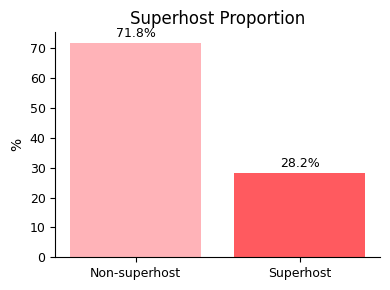

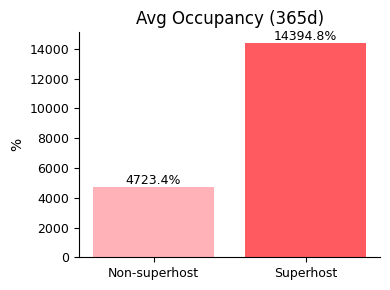

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data

df['is_superhost'] = df['host_is_superhost'].map({True: True, False: False, 't': True, 'f': False})

# Style settings: cleaned up, no grid, smaller titles
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['DejaVu Sans'],
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

# Brand colors
COL_PRIMARY = '#FF5A5F'
COL_SECONDARY = '#FFB3B8'

# 1. Private vs Non-private
plt.figure(figsize=(4,3))
counts = df['is_private'].value_counts().sort_index()
plt.bar(['False','True'], counts.values, color=[COL_PRIMARY, COL_SECONDARY])
plt.title('Private vs Non-private')
plt.xlabel('is_private')
plt.ylabel('Count')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# 2. Room type distribution
plt.figure(figsize=(5,3))
room_cols = ['room_type_Entire home/apt','room_type_Private room',
             'room_type_Shared room','room_type_Hotel room']
room_counts = df[room_cols].sum()
labels = ['Entire','Private','Shared','Hotel']
colors = [COL_PRIMARY, COL_SECONDARY, COL_SECONDARY, COL_SECONDARY]
plt.bar(labels, room_counts.values, color=colors)
plt.title('Room Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# 3. Price distribution
plt.figure(figsize=(5,3))
plt.hist(df['price'], bins=30, color=COL_PRIMARY)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# 4. Price by room_new_type
plt.figure(figsize=(5,3))
df.boxplot(column='price', by='room_new_type', patch_artist=True,
           boxprops=dict(facecolor=COL_SECONDARY),
           medianprops=dict(color=COL_PRIMARY))
plt.title('Price by Room New Type')
plt.suptitle('')
plt.xlabel('Category')
plt.ylabel('Price')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# 5. Average price by room type
plt.figure(figsize=(5,3))
avg_price = [df.loc[df[col]==1, 'price'].mean() for col in room_cols]
plt.bar(labels, avg_price, color=[COL_PRIMARY, COL_SECONDARY, COL_SECONDARY, COL_SECONDARY])
plt.title('Average Price by Type')
plt.xlabel('Type')
plt.ylabel('Avg Price')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# 6. Superhost proportion
plt.figure(figsize=(4,3))
sh_pct = df['is_superhost'].value_counts(normalize=True).rename({False:'Non-superhost',True:'Superhost'})*100
plt.bar(sh_pct.index, sh_pct.values, color=[COL_SECONDARY, COL_PRIMARY])
plt.title('Superhost Proportion')
plt.ylabel('%')
ax = plt.gca()
for bar in ax.patches:
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+1,
            f"{bar.get_height():.1f}%", ha='center', va='bottom', fontsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# 7. Occupancy by superhost
plt.figure(figsize=(4,3))
occ = df.groupby('is_superhost')['estimated_occupancy_l365d'].mean()*100
occ = occ.rename({False:'Non-superhost',True:'Superhost'})
plt.bar(occ.index, occ.values, color=[COL_SECONDARY, COL_PRIMARY])
plt.title('Avg Occupancy (365d)')
plt.ylabel('%')
ax = plt.gca()
for bar in ax.patches:
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+1,
            f"{bar.get_height():.1f}%", ha='center', va='bottom', fontsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()



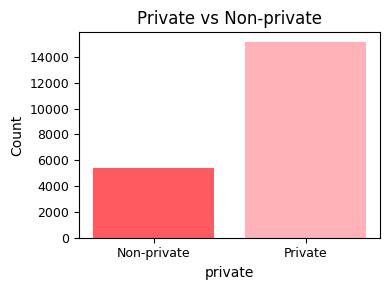

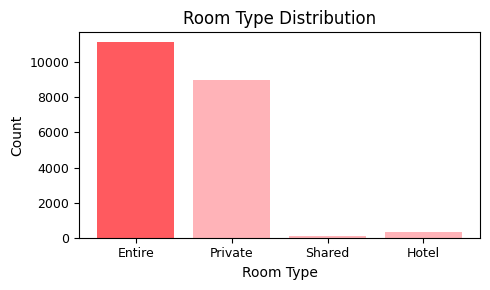

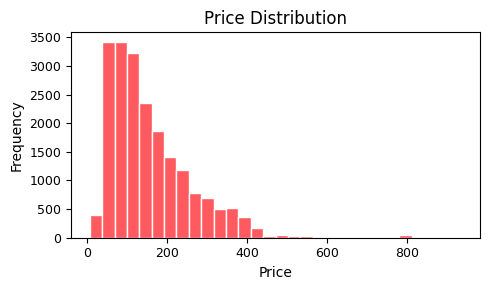

<Figure size 500x300 with 0 Axes>

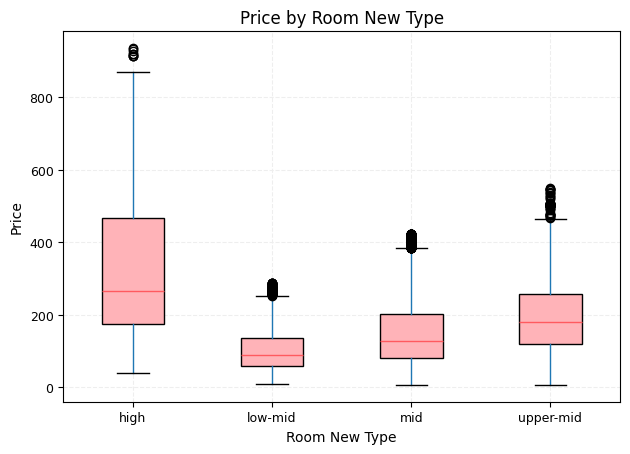

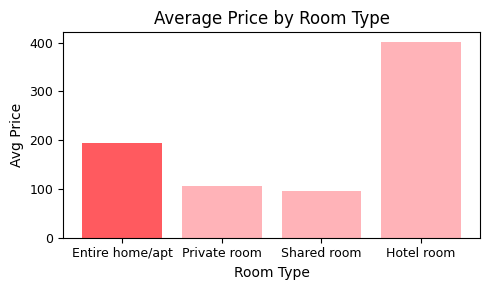

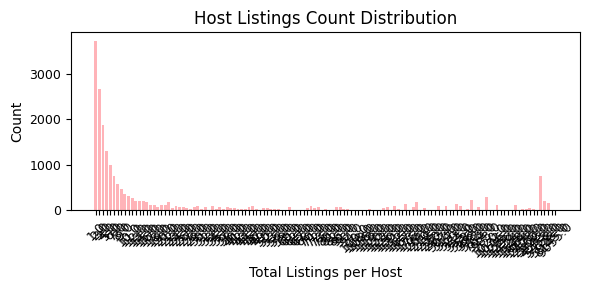

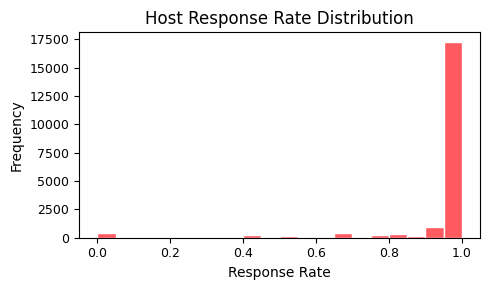

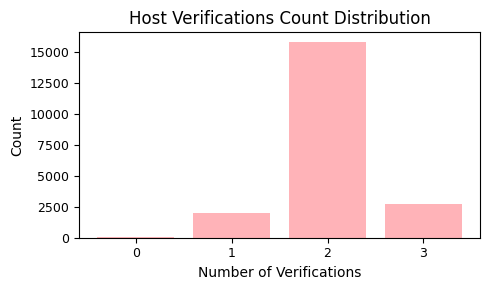

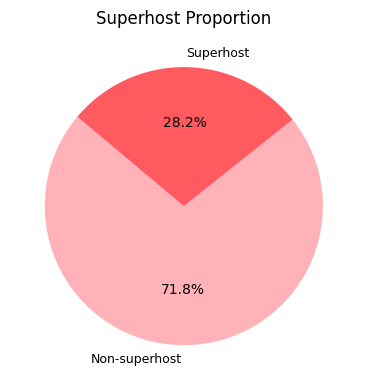

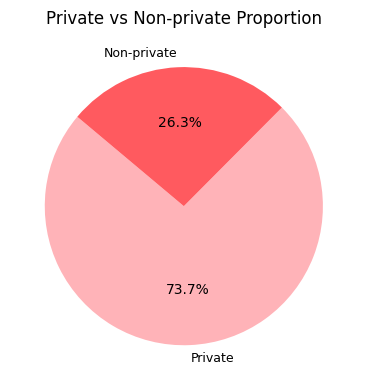

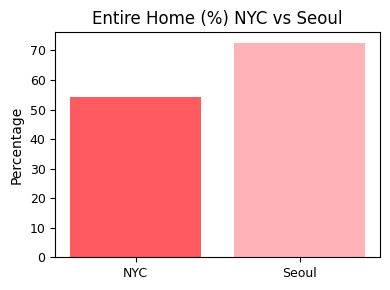

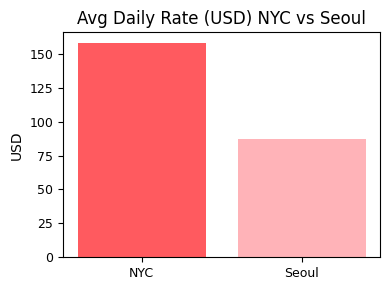

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0. Load NYC data

# 1. Private vs Non‑private counts (bar)
plt.figure(figsize=(4,3))
private_counts = df['is_private'].value_counts().sort_index()
plt.bar(['Non‑private','Private'], private_counts.values, color=['#FF5A5F','#FFB3B8'])
plt.title('Private vs Non‑private')
plt.xlabel('private')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Room type distribution (bar)
plt.figure(figsize=(5,3))
room_cols = [
    'room_type_Entire home/apt',
    'room_type_Private room',
    'room_type_Shared room',
    'room_type_Hotel room'
]
room_counts = df[room_cols].sum()
labels = ['Entire','Private','Shared','Hotel']
colors = ['#FF5A5F','#FFB3B8','#FFB3B8','#FFB3B8']
plt.bar(labels, room_counts.values, color=colors)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Price distribution (histogram)
plt.figure(figsize=(5,3))
plt.hist(df['price'], bins=30, color='#FF5A5F', edgecolor='white')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Price by room_new_type (boxplot)
plt.figure(figsize=(5,3))
df.boxplot(column='price', by='room_new_type', patch_artist=True,
           boxprops=dict(facecolor='#FFB3B8'),
           medianprops=dict(color='#FF5A5F'))
plt.title('Price by Room New Type')
plt.suptitle('')  # remove automatic 'by ...'
plt.xlabel('Room New Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# 5. Average price by room type (bar)
avg_price = {
    col.replace('room_type_',''): df.loc[df[col]==1, 'price'].mean()
    for col in room_cols
}
plt.figure(figsize=(5,3))
plt.bar(avg_price.keys(), avg_price.values(), color=['#FF5A5F','#FFB3B8','#FFB3B8','#FFB3B8'])
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Avg Price')
plt.tight_layout()
plt.show()

# 6. Host total listings count distribution (bar)
plt.figure(figsize=(6,3))
host_listings = df['host_total_listings_count'].value_counts().sort_index()
plt.bar(host_listings.index.astype(str), host_listings.values, color='#FFB3B8')
plt.title('Host Listings Count Distribution')
plt.xlabel('Total Listings per Host')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Host response rate distribution (histogram)
plt.figure(figsize=(5,3))
plt.hist(df['host_response_rate'], bins=20, color='#FF5A5F', edgecolor='white')
plt.title('Host Response Rate Distribution')
plt.xlabel('Response Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 8. Host verifications count distribution (bar)
plt.figure(figsize=(5,3))
ver_count = df['host_verifications_count'].value_counts().sort_index()
plt.bar(ver_count.index.astype(str), ver_count.values, color='#FFB3B8')
plt.title('Host Verifications Count Distribution')
plt.xlabel('Number of Verifications')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 9. Superhost proportion (pie)
plt.figure(figsize=(4,4))
sh = df['host_is_superhost'].map({True:'Superhost',False:'Non‑superhost','t':'Superhost','f':'Non‑superhost'})
sh_counts = sh.value_counts()
plt.pie(sh_counts.values,
        labels=sh_counts.index,
        colors=['#FFB3B8','#FF5A5F'],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Superhost Proportion')
plt.tight_layout()
plt.show()

# 10. Private vs Non‑private proportion (pie)
plt.figure(figsize=(4,4))
pv = df['is_private'].map({True:'Private',False:'Non‑private'})
pv_counts = pv.value_counts()
plt.pie(pv_counts.values,
        labels=pv_counts.index,
        colors=['#FFB3B8','#FF5A5F'],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Private vs Non‑private Proportion')
plt.tight_layout()
plt.show()

# 11. Compare NYC vs Seoul (bar charts)
#   metrics from df and Seoul report
nyc_entire  = df['room_type_Entire home/apt'].mean()*100
nyc_price   = df['price'].mean()
seoul_entire= 72.5
seoul_price = 87

# Entire home % comparison
plt.figure(figsize=(4,3))
plt.bar(['NYC','Seoul'], [nyc_entire, seoul_entire], color=['#FF5A5F','#FFB3B8'])
plt.title('Entire Home (%) NYC vs Seoul')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

# Avg price comparison
plt.figure(figsize=(4,3))
plt.bar(['NYC','Seoul'], [nyc_price, seoul_price], color=['#FF5A5F','#FFB3B8'])
plt.title('Avg Daily Rate (USD) NYC vs Seoul')
plt.ylabel('USD')
plt.tight_layout()
plt.show()
